<a href="https://colab.research.google.com/github/rarhimed/netology_tasks/blob/main/Math_6_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №6. Теория оптимизации

In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
from matplotlib import pyplot as plt

In [ ]:
size = 12
figure_params =  {'figure.figsize': (15, 6),
                  'axes.labelsize': size + 2,
                  'axes.titlesize': size + 2,
                  'xtick.labelsize': size,
                  'ytick.labelsize': size,
                  'axes.titlepad': 25}

plt.rcParams.update(figure_params)

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

In [ ]:
def test_params(func, bounds, param_name, data):
    iterations = []
    params = []
    for value in data:
        res = differential_evolution(func, bounds, seed=42,
                                     **{param_name: value})
        if res.success is True:
            params.append(value)
            iterations.append(res.nit)
    
    plt.plot(params, iterations)
    plt.title(param_name.capitalize(), fontsize=22)
    plt.xlabel('Params', fontsize=16)
    plt.ylabel('Iterations', fontsize=16)

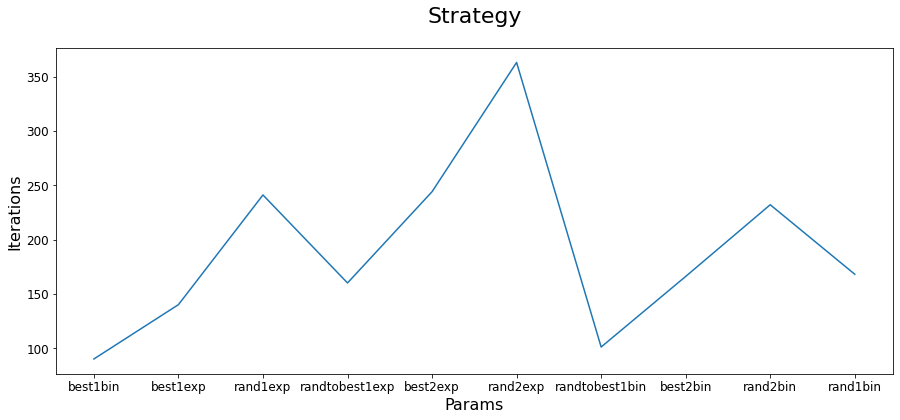

In [ ]:
strategy = ('best1bin', 'best1exp', 'rand1exp',
           'randtobest1exp', 'currenttobest1exp', 'best2exp',
           'rand2exp', 'randtobest1bin', 'currenttobest1bin',
           'best2bin', 'rand2bin', 'rand1bin')

test_params(ackley, bounds, 'strategy', strategy)

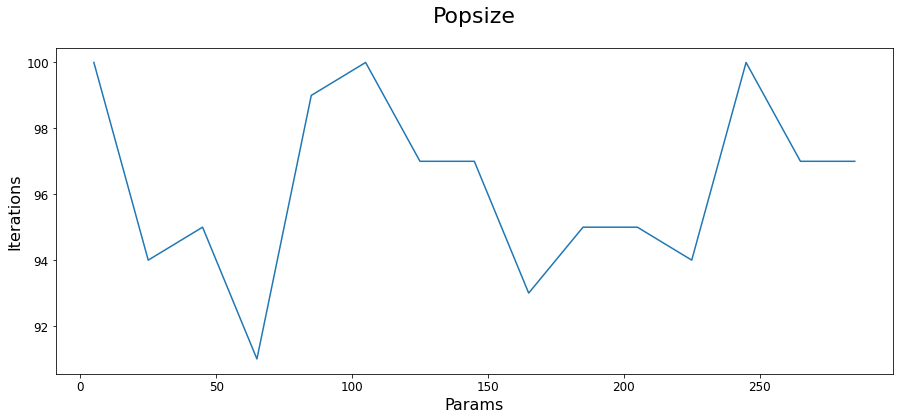

In [ ]:
popsize = [i for i in range(5, 305, 20)]

test_params(ackley, bounds, 'popsize', popsize)

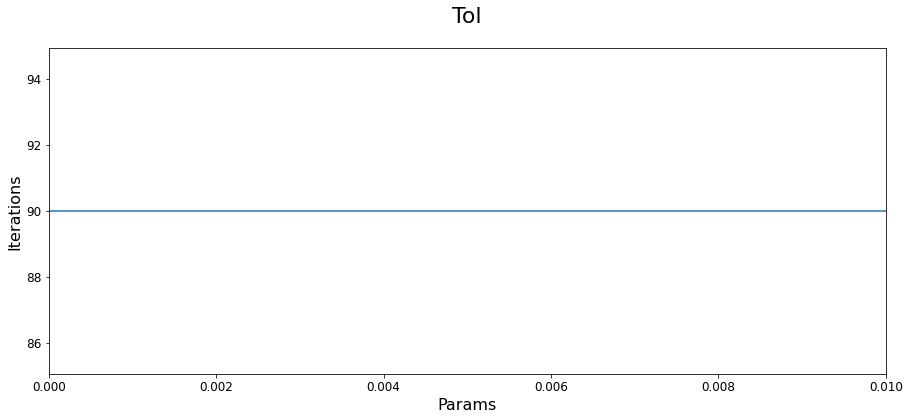

In [ ]:
tol = [10 ** (-i) for i in range (2, 10)]

test_params(ackley, bounds, 'tol', tol)

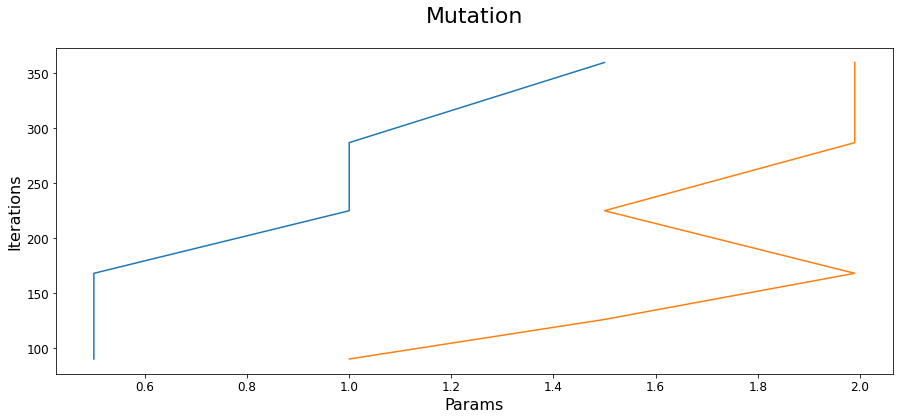

In [ ]:
mutation = [(0.5, 1), (0.5, 1.5), (0.5, 1.99),
            (1, 1.5), (1, 1.99), (1.5, 1.99)]

test_params(ackley, bounds, 'mutation', mutation)

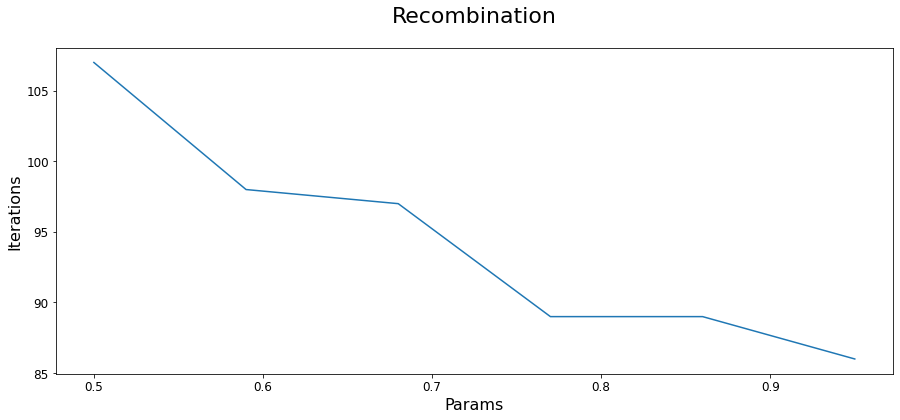

In [ ]:
recombination = [0.5 + i * 0.09 for i in range(6)]

test_params(ackley, bounds, 'recombination', recombination)

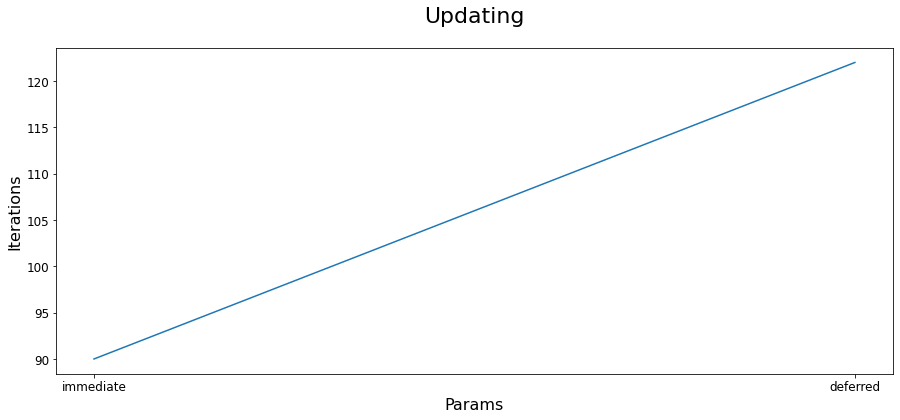

In [ ]:
updating = ('immediate', 'deferred')

test_params(ackley, bounds, 'updating', updating)

Используем для решения лучшие значения параметров, найденные на предыдущих шагах.

In [ ]:
res = differential_evolution(ackley, bounds, seed=42,
                             strategy='best1bin',
                             popsize=65,
                             mutation=(0.5, 1),
                             recombination=0.95,
                             updating='immediate')

if res.success is True:   
    print('Количество итераций:', res.nit,
          'Значение функции:', res.fun,
          'Решение:', res.x, sep='\n')
else:
    print('Решение не найдено')

Количество итераций:
82
Значение функции:
4.440892098500626e-16
Решение:
[0. 0.]


**Вывод:**
Даже без учета взаимного влияния параметров удалось получить результат, превосходящий те, что были получены при варьировании всего одного параметра.